In [77]:
import pandas as pd
bank_customers_dataset = pd.read_csv('bank_churn_dataset.csv')
bank_customers_dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [78]:
bank_customers_dataset[['EstimatedSalary']].describe()

,EstimatedSalary
count,10000.000000
mean,100090.239881
std,57510.492818
min,11.580000
25%,51002.110000
50%,100193.915000
75%,149388.247500
max,199992.480000


In [79]:
bank_customers_dataset['EstimatedSalaryClassification'] = 0
bank_customers_dataset.loc[(bank_customers_dataset['EstimatedSalary'] > 51010) & (bank_customers_dataset['EstimatedSalary'] <= 100200), 'EstimatedSalaryClassification'] = 1
bank_customers_dataset.loc[(bank_customers_dataset['EstimatedSalary'] > 100200) & (bank_customers_dataset['EstimatedSalary'] <= 150000), 'EstimatedSalaryClassification'] = 2
bank_customers_dataset.loc[(bank_customers_dataset['EstimatedSalary'] > 150000), 'EstimatedSalaryClassification'] = 3

bank_customers_dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,EstimatedSalaryClassification
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,2
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,2
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,2
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1


In [80]:
def q1(x):
    return x.quantile(0.37)
def q2(x):
    return x.quantile(0.6)
def q3(x):
    return x.quantile(0.8)


group_data = bank_customers_dataset.groupby(['EstimatedSalaryClassification'])['Balance'].agg([q1,q2, q3, 'mean'])
group_data

,q1,q2,q3,mean
EstimatedSalaryClassification,,,,
0,0.0000,109036.896,133749.790,75631.508780
1,44478.2332,111036.880,133268.352,75923.893992
2,61228.9656,110072.746,133609.802,77160.150892
3,58456.1690,110525.474,134484.224,77229.247222


In [81]:
def classify_balance(row):
    if row['Balance'] <= group_data.loc[row['EstimatedSalaryClassification'], 'q1']:
        return 0
    elif row['Balance'] <= group_data.loc[row['EstimatedSalaryClassification'], 'q2']:
        return 1
    elif row['Balance'] <= group_data.loc[row['EstimatedSalaryClassification'], 'q3']:
        return 2
    else:
        return 3

bank_customers_dataset['BalanceRelativeClassifier'] = bank_customers_dataset.apply(classify_balance, axis=1)

bank_customers_dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,EstimatedSalaryClassification,BalanceRelativeClassifier
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,2,0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,2,1
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,2,3
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,2


In [82]:
bank_customers_dataset['Balance'].describe()

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64

In [83]:
bank_customers_dataset['BalanceAbsoluteClassification'] = 0
bank_customers_dataset.loc[(bank_customers_dataset['Balance'] > 0) & (bank_customers_dataset['Balance'] <= 98000), 'BalanceAbsoluteClassification'] = 1
bank_customers_dataset.loc[(bank_customers_dataset['Balance'] > 98000) & (bank_customers_dataset['Balance'] <= 128000), 'BalanceAbsoluteClassification'] = 2
bank_customers_dataset.loc[(bank_customers_dataset['Balance'] > 128000), 'BalanceAbsoluteClassification'] = 3

bank_customers_dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,EstimatedSalaryClassification,BalanceRelativeClassifier,BalanceAbsoluteClassification
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,2,0,0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,2,1,1
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,2,3,3
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,2,2


In [84]:
bank_customers_dataset.groupby(['EstimatedSalaryClassification'])[['BalanceAbsoluteClassification', 'BalanceRelativeClassifier']].agg([lambda x: x.quantile(0.25), lambda x: x.quantile(0.75), 'count'])

BalanceAbsoluteClassification                   \
                                                 <lambda_0> <lambda_1> count   
EstimatedSalaryClassification                                                  
0                                                       0.0       2.25  2500   
1                                                       0.0       2.00  2500   
2                                                       0.0       2.00  2545   
3                                                       0.0       3.00  2455   

                              BalanceRelativeClassifier                   
                                             <lambda_0> <lambda_1> count  
EstimatedSalaryClassification                                             
0                                                   0.0        2.0  2500  
1                                                   0.0        2.0  2500  
2                                                   0.0        2.0  2545  
3                                                   0.0        2.0  2455

In [85]:
bank_customers_dataset['GeographyClassification'] = bank_customers_dataset['Geography'].replace({'France': 0, 'Spain':1, 'Germany':2})
bank_customers_dataset['GenderClassification'] = bank_customers_dataset['Gender'].replace({'Female': 0, 'Male':1})
bank_customers_dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,EstimatedSalaryClassification,BalanceRelativeClassifier,BalanceAbsoluteClassification,GeographyClassification,GenderClassification
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,2,0,0,0,0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,2,1,1,1,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,2,3,3,0,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0,0,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,2,2,1,0


In [86]:
bank_customers_dataset['Age'].describe()

bank_customers_dataset['AgeClassification'] = 0
bank_customers_dataset.loc[(bank_customers_dataset['Age'] > 32) & (bank_customers_dataset['Age'] <= 37),'AgeClassification'] = 1
bank_customers_dataset.loc[(bank_customers_dataset['Age'] > 37) & (bank_customers_dataset['Age'] <= 44),'AgeClassification'] = 2
bank_customers_dataset.loc[(bank_customers_dataset['Age'] > 44),'AgeClassification'] = 3

bank_customers_dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,EstimatedSalaryClassification,BalanceRelativeClassifier,BalanceAbsoluteClassification,GeographyClassification,GenderClassification,AgeClassification
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,2,0,0,0,0,2
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,2,1,1,1,0,2
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,2,3,3,0,0,2
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0,0,0,2
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,2,2,1,0,2


In [87]:
bank_customers_dataset['CreditScore'].describe()


bank_customers_dataset['CreditScoreClassification'] = 0
bank_customers_dataset.loc[(bank_customers_dataset['CreditScore'] > 584) & (bank_customers_dataset['CreditScore'] <= 652),'CreditScoreClassification'] = 1
bank_customers_dataset.loc[(bank_customers_dataset['CreditScore'] > 652) & (bank_customers_dataset['CreditScore'] <= 718),'CreditScoreClassification'] = 2
bank_customers_dataset.loc[(bank_customers_dataset['CreditScore'] > 718),'CreditScoreClassification'] = 3

In [88]:
bank_customers_dataset['Tenure'].describe()


bank_customers_dataset['TenureClassification'] = 0
bank_customers_dataset.loc[(bank_customers_dataset['Tenure'] > 3) & (bank_customers_dataset['Tenure'] <= 5),'TenureClassification'] = 1
bank_customers_dataset.loc[(bank_customers_dataset['Tenure'] > 5) & (bank_customers_dataset['Tenure'] <= 7),'TenureClassification'] = 2
bank_customers_dataset.loc[(bank_customers_dataset['Tenure'] > 7),'TenureClassification'] = 3

In [89]:
bank_customers_dataset[['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance','EstimatedSalary']].isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
EstimatedSalary    0
dtype: int64

In [90]:
bank_customers_dataset.columns

bank_customers_train_dataset = bank_customers_dataset.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance','EstimatedSalary'])
bank_customers_train_dataset.head()

,NumOfProducts,HasCrCard,IsActiveMember,Exited,EstimatedSalaryClassification,BalanceRelativeClassifier,BalanceAbsoluteClassification,GeographyClassification,GenderClassification,AgeClassification,CreditScoreClassification,TenureClassification
0,1,1,1,1,2,0,0,0,0,2,1,0
1,1,0,1,0,2,1,1,1,0,2,1,0
2,3,1,0,1,2,3,3,0,0,2,0,3
3,2,0,0,0,1,0,0,0,0,2,2,0
4,1,1,1,0,1,2,2,1,0,2,3,0


<Axes: title={'center': 'Pearson Correlation of Features'}>

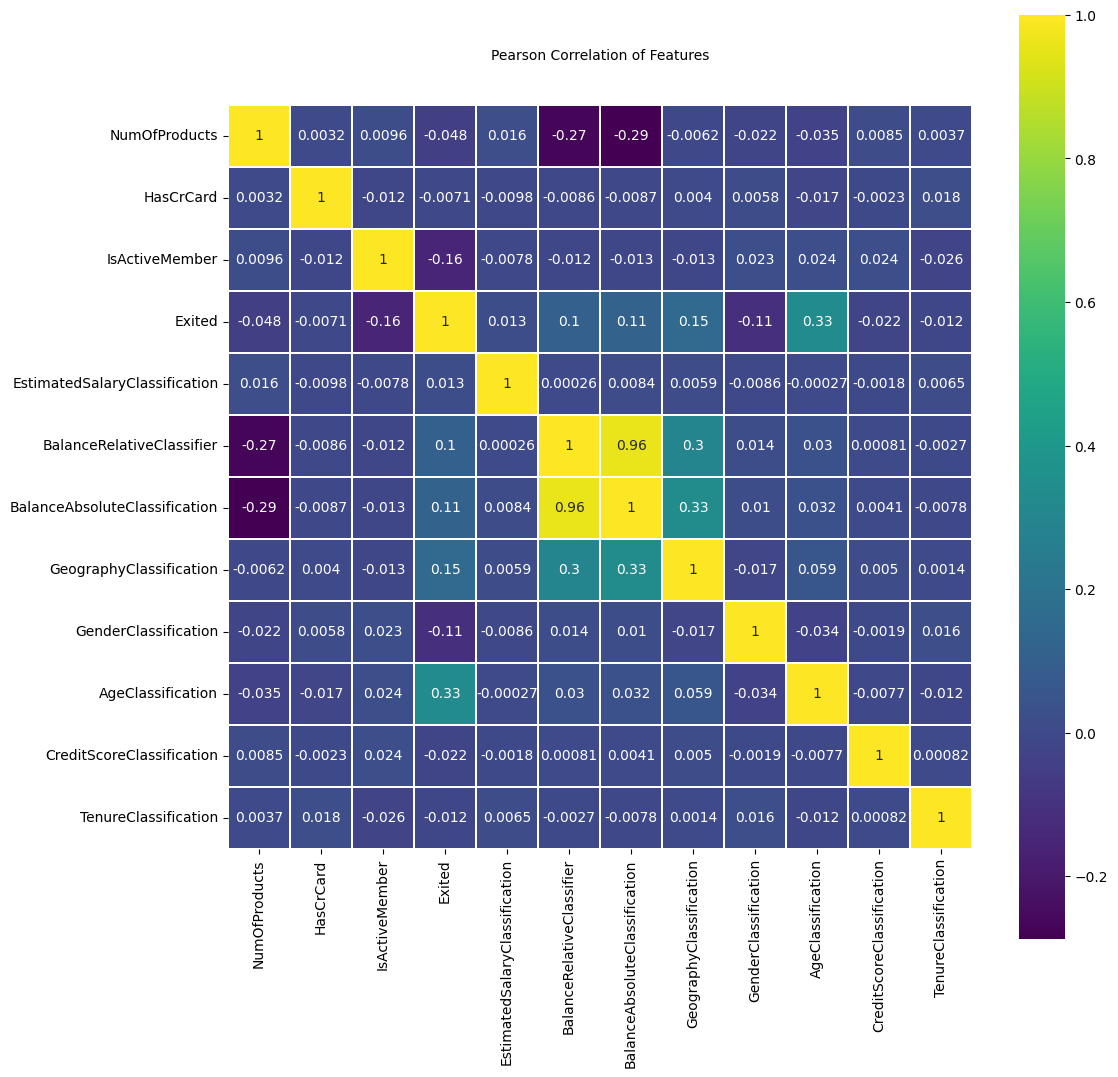

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=10)
sns.heatmap(bank_customers_train_dataset.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [94]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import numpy as np

cross_validation = KFold(n_splits=10)
accuracies = list()
attributes = len(list(bank_customers_train_dataset))
depth_range = range(1,attributes+1)

for depth in depth_range:
    fold_accuracy = []
    decision_tree = DecisionTreeClassifier(max_depth=depth)
    for train_fold, valid_fold in cross_validation.split(bank_customers_train_dataset):
        decision_tree.fit(bank_customers_train_dataset.iloc[train_fold].drop(columns=['Exited']), bank_customers_train_dataset.iloc[train_fold]['Exited'])
        predictions = decision_tree.predict(bank_customers_train_dataset.iloc[valid_fold].drop(columns=['Exited']))

        fold_accuracy.append(accuracy_score(bank_customers_train_dataset.iloc[valid_fold]['Exited'], predictions))
    
    accuracies.append(np.mean(fold_accuracy))
df = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
df = df[["Max Depth", "Average Accuracy"]]
df

,Max Depth,Average Accuracy
0,1,0.7963
1,2,0.8409
2,3,0.8461
3,4,0.8529
4,5,0.8566
5,6,0.8551
6,7,0.8548
7,8,0.8527
8,9,0.8515
9,10,0.8493


In [96]:
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(bank_customers_train_dataset.drop(columns=['Exited']), bank_customers_train_dataset['Exited'], test_size = 0.3)

model = DecisionTreeClassifier(max_depth=5)
model.fit(X= X_train, y= y_train)

export_graphviz(model, out_file="bank_churn.dot", feature_names=list(X_train), class_names=['NotExited', 'Exited'], label="all", rounded=False, impurity = True, filled=True)
accuracy_score(y_test, model.predict(X_test))


0.8616666666666667